## 데이터 불러오기

In [110]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

submission = pd.read_csv('sample_submission.csv')

In [122]:
train['물품_카테고리'].nunique()

100

In [123]:
train.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,67,3
1,1,4148000690043300,5011000264024400,34,3
2,2,5011000078068400,1120000007005400,27,3
3,3,4127100048006400,5011000587019400,17,7
4,4,5011000078068400,2823700010076300,27,3


In [124]:
test.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
0,0,4167000577042200,5011000435014100,47
1,1,1156000009012200,5011000172034400,12
2,2,4122000363057300,5011000361097300,88
3,3,5011000436041400,2826000084036400,58
4,4,4150000241065200,5011000169044300,39


In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   index         31684 non-null  int64
 1   송하인_격자공간고유번호  31684 non-null  int64
 2   수하인_격자공간고유번호  31684 non-null  int64
 3   물품_카테고리       31684 non-null  int32
 4   운송장_건수        31684 non-null  int64
dtypes: int32(1), int64(4)
memory usage: 1.1 MB


In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   index         7920 non-null   int64
 1   송하인_격자공간고유번호  7920 non-null   int64
 2   수하인_격자공간고유번호  7920 non-null   int64
 3   물품_카테고리       7920 non-null   int32
dtypes: int32(1), int64(3)
memory usage: 216.7 KB


In [127]:
train.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

## 데이터 전처리

In [128]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train['물품_카테고리'])

train['물품_카테고리'] = encoder.transform(train['물품_카테고리'])
test['물품_카테고리'] = encoder.transform(test['물품_카테고리'])

In [129]:
test['물품_카테고리']

0       47
1       12
2       88
3       58
4       39
        ..
7915    27
7916    34
7917    27
7918    27
7919    34
Name: 물품_카테고리, Length: 7920, dtype: int64

## 모델링

In [43]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf= DecisionTreeClassifier()


train_X = train.drop('운송장_건수',axis = 1)
train_Y = train['운송장_건수']

#모델 정의;선형회귀
model =LinearRegression()

In [ ]:
from sklearn.model_selection import KFold

features = iris.data
label=iris.target

dt_clf = DecisionTreeClassifier()

kfold=KFold(n_splits=4, shuffle=True) 

count = 0
cv_accuracy=[]

In [ ]:
rr=Ridge()
rr.fit()

In [44]:
# 모델 학습
model.fit(train_X,train_Y)

LinearRegression()

In [45]:
# test 데이터 예측
pred = model.predict(test)

In [46]:
submission.columns

Index(['index', '운송장_건수'], dtype='object')

In [47]:
submission['운송장_건수'] =pred

In [48]:
submission

,index,운송장_건수
0,0,5.187248
1,1,5.742693
2,2,5.263987
3,3,4.465043
4,4,5.177561
...,...,...
7915,7915,4.946398
7916,7916,5.844163
7917,7917,4.041614
7918,7918,4.554181


## 정답파일 생성

In [97]:
submission.to_csv('first_submission.csv',index = False)

In [98]:
from dacon_submit_api import dacon_submit_api 

result = dacon_submit_api.post_submission_file(
'first_submission.csv', 
'7f3de4f57ce3f3749a047ae0c34f0879c4b888772c85007224af95fc16cc8d91', 
'235867', 
'dpwls6401', 
'처음 submission' )

{'isSubmitted': True, 'detail': 'Success'}


In [99]:
!pip install dacon_submit_api-0.0.4-py3-none-any.whl

Processing c:\users\yejin\workspace\dacon_submit_api-0.0.4-py3-none-any.whl
dacon-submit-api is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [93]:
sample_submission = pd.read_csv('sample_submission.csv',index_col = 0)
test = pd.read_csv('test.csv',index_col = 0)
train = pd.read_csv('train.csv',index_col = 0)

In [94]:
train['송하인_시군구'] = train['송하인_격자공간고유번호']//100000000000
train['수하인_시군구'] = train['수하인_격자공간고유번호']//100000000000
train

,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,송하인_시군구,수하인_시군구
index,,,,,,
0,5011000595017300,2871000192069300,음반,3,50110,28710
1,4148000690043300,5011000264024400,문화컨텐츠,3,41480,50110
2,5011000078068400,1120000007005400,농산물,3,50110,11200
3,4127100048006400,5011000587019400,기타식품,7,41271,50110
4,5011000078068400,2823700010076300,농산물,3,50110,28237
...,...,...,...,...,...,...
31679,4471000290087200,5011000213073200,스포츠잡화,3,44710,50110
31680,1129000014045300,5011000319087100,스마트디바이스,4,11290,50110
31681,1129000014045300,5011000263065200,스마트디바이스,6,11290,50110


In [95]:
train

,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,송하인_시군구,수하인_시군구
index,,,,,,
0,5011000595017300,2871000192069300,음반,3,50110,28710
1,4148000690043300,5011000264024400,문화컨텐츠,3,41480,50110
2,5011000078068400,1120000007005400,농산물,3,50110,11200
3,4127100048006400,5011000587019400,기타식품,7,41271,50110
4,5011000078068400,2823700010076300,농산물,3,50110,28237
...,...,...,...,...,...,...
31679,4471000290087200,5011000213073200,스포츠잡화,3,44710,50110
31680,1129000014045300,5011000319087100,스마트디바이스,4,11290,50110
31681,1129000014045300,5011000263065200,스마트디바이스,6,11290,50110


In [96]:
train=train.drop('송하인_격자공간고유번호',axis=1)
train=train.drop('수하인_격자공간고유번호',axis=1)
train=train.drop('수하인_시군구',axis=1)
# train=train.drop('index',axis=1)

train.head(50)

,물품_카테고리,운송장_건수,송하인_시군구
index,,,
0,음반,3,50110
1,문화컨텐츠,3,41480
2,농산물,3,50110
3,기타식품,7,41271
4,농산물,3,50110
5,농산물,6,50130
6,수산,5,50110
7,농산물,3,50130
8,아우터,3,41360


In [90]:
# train_group=train.groupby(['수하인_시군구','물품_카테고리']).sum()
# train_group

운송장_건수
수하인_시군구 물품_카테고리        
11110   가공식품         11
        건강식품          3
        과자           18
        기타식품         13
        기타패션의류       14
...                 ...
50130   헤어스타일링        3
        헤어액세서리        4
        헤어케어         77
        헬스            7
        홈데코          19

[1838 rows x 1 columns]

In [97]:
train_group=train.groupby(['송하인_시군구','물품_카테고리']).sum()
train_group

운송장_건수
송하인_시군구 물품_카테고리        
11110   가공식품          8
        건강식품          5
        공구           42
        과자           49
        기타식품          5
...                 ...
50130   축산          170
        취미용품         35
        커튼/블라인드      26
        하의           10
        홈데코           7

[2342 rows x 1 columns]

In [98]:
train_group.sort_values(by='운송장_건수',ascending=False).head(50)

운송장_건수
송하인_시군구 물품_카테고리          
50130   농산물         44669
50110   농산물         41205
41480   문화컨텐츠        4273
50110   수산           4169
        음료           3229
        축산           2630
        기타식품         1854
        음반           1659
41173   기타패션의류       1617
50110   가공식품         1480
11170   기타디지털/가전      941
41500   건강식품          867
50110   기타패션의류        676
41480   음반            672
41461   문구/사무용품       578
50110   과자            576
        냉동/간편조리식품     570
        건강식품          554
41360   반려동물          485
41410   건강용품          468
41480   가공식품          464
41410   가공식품          452
41500   다이어트식품        439
50130   음료            404
44133   신발            392
50130   기타식품          390
41570   가공식품          389
41590   냉동/간편조리식품     377
48730   낚시            316
50130   과자            316
41590   가공식품          283
41500   음료            254
41410   스킨케어          232
44200   음료            230
50110   문화컨텐츠         221
30230   생활용품          216
41550   취미용품          213
41199   주방용품          207
11530   가공식품          205
41590   생활용품          200
        음료            186
41570   음료            179
41461   스킨케어          177
41273   상의            177
41220   가공식품          174
41610   건강용품          172
44270   건강식품          170
50130   축산            170
41285   가공식품          166
41410   상의            165

kfold 사용

In [138]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

sample_submission = pd.read_csv('sample_submission.csv',index_col = 0)
test = pd.read_csv('test.csv',index_col = 0)
train = pd.read_csv('train.csv',index_col = 0)

encoder = LabelEncoder()
encoder.fit(train['물품_카테고리'])

train['물품_카테고리'] = encoder.transform(train['물품_카테고리'])
test['물품_카테고리'] = encoder.transform(test['물품_카테고리'])

model = LinearRegression()

x_train = train[['송하인_격자공간고유번호','수하인_격자공간고유번호','물품_카테고리']]
y_train = train['운송장_건수']

model.fit(x_train,y_train)
pred1 = model.predict(x_train)
RMSE = mean_squared_error(y_train, pred1)**0.5
RMSE

6.74184578122842

In [139]:
# sample_submission = pd.read_csv('sample_submission.csv',index_col = 0)
# test = pd.read_csv('test.csv',index_col = 0)
# train = pd.read_csv('train.csv',index_col = 0)

# encoder = LabelEncoder()
# encoder.fit(train['물품_카테고리'])

# train['물품_카테고리'] = encoder.transform(train['물품_카테고리'])
# test['물품_카테고리'] = encoder.transform(test['물품_카테고리'])

# model = Ridge()

# x_train = train[['송하인_격자공간고유번호','수하인_격자공간고유번호','물품_카테고리']]
# y_train = train['운송장_건수']

# model.fit(x_train,y_train)
# pred1 = model.predict(x_train)
# RMSE = mean_squared_error(y_train, pred1)**0.5
# RMSE

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29628e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


6.741842739090097

In [145]:
from sklearn.model_selection import KFold

features = x_train
label=train.target

dt_clf = DecisionTreeClassifier()

kfold=KFold(n_splits=4, shuffle=True) #전체가 5묶음으로 쪼개져서 나옴

count = 0
cv_accuracy=[]

for train_index, test_index in kfold.split(features):
    X_train,X_test=features[train_index],features[test_index]
    y_train,y_test=label[train_index],label[test_index]
    
    print(test_index)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    
    accuracy=accuracy_score(y_test,pred)
    cv_accuracy.append(accuracy)

print(np.mean(cv_accuracy))

KeyError: "None of [Int64Index([    1,     2,     3,     4,     5,     8,    11,    12,    13,\n               14,\n            ...\n            31674, 31675, 31676, 31677, 31678, 31679, 31680, 31681, 31682,\n            31683],\n           dtype='int64', length=23763)] are in the [columns]"

In [165]:
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet

sample_submission = pd.read_csv('sample_submission.csv',index_col = 0)
test = pd.read_csv('test.csv',index_col = 0)
train = pd.read_csv('train.csv',index_col = 0)

encoder = LabelEncoder()
encoder.fit(train['물품_카테고리'])

train['물품_카테고리'] = encoder.transform(train['물품_카테고리'])
test['물품_카테고리'] = encoder.transform(test['물품_카테고리'])

x = train.drop('운송장_건수', axis = 1).values
y = train['운송장_건수'].values
from sklearn.model_selection import KFold

kf = KFold(n_splits=2)
RMSE_sum = 0

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    regr = ElasticNet(random_state=0)
    model = regr.fit(x_train,y_train)
    
    pred = model.predict(x_test)
    RMSE_sum += mean_squared_error(y_test, pred)**0.5

print(RMSE_sum/2)

6.696175282783512


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30432.68361664866, tolerance: 55.18160854058834
  model = cd_fast.enet_coordinate_descent(


In [157]:
submission.to_csv('logistics_submission.csv',index = False)

In [ ]:
from dacon_submit_api import dacon_submit_api 

result = dacon_submit_api.post_submission_file(
'logistics_submission.csv', 
'7f3de4f57ce3f3749a047ae0c34f0879c4b888772c85007224af95fc16cc8d91', 
'235867', 
'dpwls6401', 
'처음 submission' )

re

In [170]:
sample_submission = pd.read_csv('sample_submission.csv',index_col = 0)
test = pd.read_csv('test.csv',index_col = 0)
train = pd.read_csv('train.csv',index_col = 0)

encoder = LabelEncoder()
encoder.fit(train['물품_카테고리'])

train['물품_카테고리'] = encoder.transform(train['물품_카테고리'])
test['물품_카테고리'] = encoder.transform(test['물품_카테고리'])
RMSE_sum = 0

x_train = train.drop('운송장_건수',axis = 1)
y_train = train['운송장_건수']

regr = ElasticNet(random_state=0)
model = regr.fit(x_train,y_train)

pred = model.predict(test)


pred

array([5.29498619, 5.91964271, 5.30432183, ..., 4.11094617, 4.62512959,
       5.91777564])

0114 decisiontree_regressor

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [43]:
sample_submission = pd.read_csv('sample_submission.csv',index_col = 0)
test = pd.read_csv('test.csv',index_col = 0)
train = pd.read_csv('train.csv',index_col = 0)

encoder = LabelEncoder()
encoder.fit(train['물품_카테고리'])

train['물품_카테고리'] = encoder.transform(train['물품_카테고리'])
test['물품_카테고리'] = encoder.transform(test['물품_카테고리'])
RMSE_sum = 0

x_train = train.drop('운송장_건수',axis = 1)
y_train = train['운송장_건수']

regr = DecisionTreeRegressor(random_state=0)
model = regr.fit(x_train,y_train)

pred = model.predict(test)

pred

array([ 3.33333333,  4.        , 14.        , ...,  3.675     ,
        3.92307692,  3.45454545])

In [44]:
train_entropy=[]
for i in range(1,16): #range는 임의로
    dt_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=i) #max_depth로 지니지수 성능 파악
    dt_entropy.fit(x_train,y_train)
    
    train_acc = dt_entropy.score(x_train,y_train) #score; predict도 하고 mean accuracy도 구해줌
    train_entropy.append(train_acc)

In [45]:
train_entropy

[0.5543807600050499,
 0.5543807600050499,
 0.5543807600050499,
 0.5543807600050499,
 0.5543807600050499,
 0.5549804317636662,
 0.5558010352228254,
 0.5576000504986744,
 0.5613874510794091,
 0.568772882211842,
 0.578809493750789,
 0.5921600807978791,
 0.6078462315364221,
 0.621922737028153,
 0.6347998990026512]

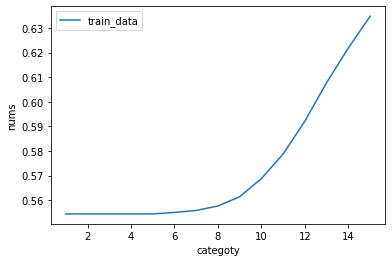

In [48]:
import numpy as np
iter_ranges=np.linspace(1,15,num=15)
plt.plot(iter_ranges, train_entropy,label="train_data")
plt.xlabel("categoty")
plt.ylabel("nums")
plt.legend(loc='best')
plt.show();

In [50]:
np.argmax(train_entropy)

14

In [ ]:
#x_train을 train과 test로 나누는 코드
x_train, x_test,y_train,y_test = train_test_split(train.drop('운송장_건수', axis = 1).values, train['운송장_건수'].values,test_size=0.2, random_state=i)

re

In [61]:
sample_submission = pd.read_csv('sample_submission.csv',index_col = 0)
test = pd.read_csv('test.csv',index_col = 0)
train = pd.read_csv('train.csv',index_col = 0)

test.insert(0,'수하인',test['수하인_격자공간고유번호'].values//100000000000)
test.insert(0,'송하인',test['송하인_격자공간고유번호'].values//100000000000)

test.drop('송하인_격자공간고유번호',axis = 1, inplace = True)
test.drop('수하인_격자공간고유번호',axis = 1, inplace = True)

train.insert(0,'수하인',train['수하인_격자공간고유번호'].values//100000000000)
train.insert(0,'송하인',train['송하인_격자공간고유번호'].values//100000000000)

train.drop('송하인_격자공간고유번호',axis = 1, inplace = True)
train.drop('수하인_격자공간고유번호',axis = 1, inplace = True)


train

,송하인,수하인,물품_카테고리,운송장_건수
index,,,,
0,50110,28710,음반,3
1,41480,50110,문화컨텐츠,3
2,50110,11200,농산물,3
3,41271,50110,기타식품,7
4,50110,28237,농산물,3
...,...,...,...,...
31679,44710,50110,스포츠잡화,3
31680,11290,50110,스마트디바이스,4
31681,11290,50110,스마트디바이스,6


In [62]:
col_list = train.columns[:-1]

train = pd.get_dummies(train, columns=col_list, drop_first=True)
train.shape

(31684, 586)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31684 entries, 0 to 31683
Columns: 586 entries, 운송장_건수 to 물품_카테고리_홈데코
dtypes: int64(1), uint8(585)
memory usage: 18.2 MB


In [64]:
train.isna().sum()

운송장_건수            0
송하인_11140         0
송하인_11170         0
송하인_11200         0
송하인_11215         0
                 ..
물품_카테고리_헤어스타일링    0
물품_카테고리_헤어액세서리    0
물품_카테고리_헤어케어      0
물품_카테고리_헬스        0
물품_카테고리_홈데코       0
Length: 586, dtype: int64

In [67]:
x_train, x_test,y_train,y_test = train_test_split(train.drop('운송장_건수', axis = 1).values, train['운송장_건수'].values,test_size=0.2, random_state=42)

regr = DecisionTreeRegressor(random_state=42)
model=regr.fit(x_train,y_train)

pred=model.predict(x_test)
RMSE=mean_squared_error(y_test,pred)**0.5
RMSE

6.672649794416302